# **Emotion Detection using CNN**
> 🤔 **Note:** Our Deep CNN model will be able to classify different images of faces as ```Happy``` or ```Sad```

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = '/content/drive/MyDrive/data'

## Loading Data
> We are going to be using ```tf.keras.utils.image_dataset_from_directory``` to load our data present in the ```data``` folder

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = (256, 256)

In [5]:
data = tf.keras.utils.image_dataset_from_directory(
    data_path,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    shuffle = True
)

Found 305 files belonging to 2 classes.


In [6]:

data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
# Loading the first batch of data
batch = data_iterator.next()
batch[0].shape, batch[1]

((32, 256, 256, 3),
 array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int32))

In [9]:
batch[0][0]

array([[[210.     , 251.     , 237.     ],
        [210.08594, 250.57031, 236.05469],
        [210.47656, 248.61719, 231.75781],
        ...,
        [231.     , 236.     , 230.     ],
        [231.     , 236.     , 230.     ],
        [231.     , 236.     , 230.     ]],

       [[211.89062, 251.34375, 237.     ],
        [211.91748, 250.86975, 236.02515],
        [212.03955, 248.71521, 231.594  ],
        ...,
        [230.91003, 235.78717, 229.82812],
        [230.8429 , 235.82074, 229.82812],
        [230.82812, 235.82812, 229.82812]],

       [[220.48438, 252.90625, 237.     ],
        [220.24268, 252.23083, 235.89087],
        [219.14404, 249.16077, 230.84937],
        ...,
        [230.5011 , 234.81976, 229.04688],
        [230.12878, 235.00592, 229.04688],
        [230.04688, 235.04688, 229.04688]],

       ...,

       [[210.61719, 222.61719, 222.61719],
        [210.50305, 222.24524, 222.1593 ],
        [209.98425, 220.55457, 220.078  ],
        ...,
        [219.57031, 208.57

In [10]:
tf.reduce_min(batch[0][0]), tf.reduce_max(batch[0][0])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=255.0>)

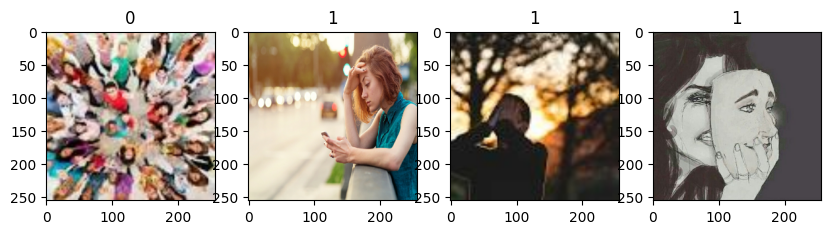

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(10, 10))
for i, img in enumerate(batch[0][:4]):
  ax[i].imshow(img.astype('int'))
  ax[i].title.set_text(batch[1][i])

## Scaling our Data
> After, Loading we have to scale our data using ```.map()```


* Because Neural Networks tend to perform better with scaled/normalized data ```Pixel Values range from 0 to 1```

In [12]:
data = data.map(lambda x, y: (x/255, y))

In [13]:
scaled_data_iterator = data.as_numpy_iterator()
scaled_batch = scaled_data_iterator.next()

In [14]:
scaled_batch[0][0]

array([[[0.49816176, 0.32561275, 0.18051471],
        [0.5147059 , 0.34215686, 0.19509804],
        [0.5225107 , 0.3499617 , 0.19702053],
        ...,
        [0.21812193, 0.19165134, 0.20635723],
        [0.24031863, 0.1814951 , 0.1814951 ],
        [0.30549172, 0.22502297, 0.21035539]],

       [[0.513534  , 0.340985  , 0.19588695],
        [0.51941633, 0.34686735, 0.19980852],
        [0.5386412 , 0.3660922 , 0.21315104],
        ...,
        [0.25571385, 0.22924326, 0.24394915],
        [0.2698223 , 0.21665135, 0.21382506],
        [0.32295495, 0.24836856, 0.23264399]],

       [[0.5206112 , 0.3480622 , 0.20296416],
        [0.54630053, 0.37375152, 0.2266927 ],
        [0.5442938 , 0.37174478, 0.21880361],
        ...,
        [0.31338847, 0.2869179 , 0.30162376],
        [0.3275046 , 0.27456343, 0.27652422],
        [0.36377144, 0.2927926 , 0.28416818]],

       ...,

       [[0.49195772, 0.40647978, 0.32881433],
        [0.4990196 , 0.41354167, 0.33705577],
        [0.50785846, 0

In [15]:
tf.reduce_min(scaled_batch[0][0]), tf.reduce_max(scaled_batch[0][0])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

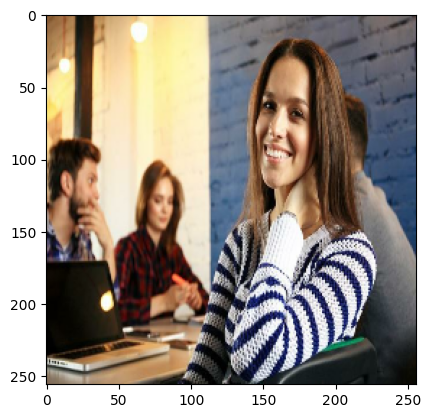

In [16]:
plt.imshow(scaled_batch[0][0])

## Partioning Data
> Splitting data into Training and Testing

In [17]:
len(data)

10

In [18]:
train_data_size = int(len(data)*0.8)
test_data_size = int(len(data)*0.2)

In [19]:
train_data_size, test_data_size

(8, 2)

In [20]:
train_data = data.take(train_data_size)
test_data = data.skip(train_data_size).take(test_data_size)

In [21]:
train_data

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Setting up callbacks
* ModelCheckpoint Callback
* TensorBoard Callback

In [22]:
def model_checkpoint_callback(checkpoint_file_path):
# Creating a Model CheckPoint callback to save the model's weigth only per epoch
  callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_file_path,
                                                monitor='val_accuracy',
                                                save_weights_only=True,
                                                save_best_only=True,
                                                save_freq='epoch', # save per epoch
                                                verbose=1)
  return callback

In [23]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## Model Building
> We are first going to build a base CNN model, to improve on

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers.experimental import preprocessing

In [25]:
model1 = Sequential()

# Data Augmentation Layers
# model1.add(preprocessing.RandomRotation(0.2))
# model1.add(preprocessing.RandomZoom(0.2))
# model1.add(preprocessing.RandomHeight(0.2))
# model1.add(preprocessing.RandomWidth(0.2))

model1.add(Conv2D(filters=16, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model1.add(Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model1.add(Conv2D(filters=15, kernel_size=(3, 3), padding='valid', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(1, activation='sigmoid'))

In [26]:
model1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [27]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 15)        4335      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 15)       0

In [28]:
history1 = model1.fit(
    train_data,
    epochs=20,
    validation_data=test_data,
    callbacks=[model_checkpoint_callback(checkpoint_file_path='Emotion-Detection/CNN_model1/checkpoint.ckpt'),
               create_tensorboard_callback(dir_name='Emotion Detection using CNN',
                                           experiment_name='CNN model 1')]
)

Saving TensorBoard log files to: Emotion Detection using CNN/CNN model 1/20230811-060708
Epoch 1/20
7/8 [=========================>....] - ETA: 0s - loss: 1.3925 - accuracy: 0.4598
Epoch 1: val_accuracy improved from -inf to 0.55102, saving model to Emotion-Detection/CNN_model1/checkpoint.ckpt
8/8 [==============================] - 18s 551ms/step - loss: 1.3121 - accuracy: 0.4766 - val_loss: 0.7668 - val_accuracy: 0.5510
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.7118 - accuracy: 0.5703
Epoch 2: val_accuracy improved from 0.55102 to 0.73469, saving model to Emotion-Detection/CNN_model1/checkpoint.ckpt
8/8 [==============================] - 8s 554ms/step - loss: 0.7118 - accuracy: 0.5703 - val_loss: 0.6835 - val_accuracy: 0.7347
Epoch 3/20
8/8 [==============================] - ETA: 0s - loss: 0.6844 - accuracy: 0.5859
Epoch 3: val_accuracy improved from 0.73469 to 0.81633, saving model to Emotion-Detection/CNN_model1/checkpoint.ckpt
8/8 [=======================

## Model Evaluating
**🤔 Why is Model Evaluating Important**
* Its important to evaluate our model to see its **performence on the test data**
* It also helps in **choosing the best model** among the models that you have built

> As we know that our Model Checkpoint has saved the model's weights with the best validation accuracy that is 100% and accuracy being 100% as well
* Hence we have to load the model's weights saved by our model checkpoint callback

In [29]:
best_model_results = model1.evaluate(test_data)
best_model_results

2/2 [==============================] - 4s 16ms/step - loss: 0.0165 - accuracy: 1.0000


[0.016456928104162216, 1.0]

In [30]:
model1_results = model1.evaluate(test_data)

2/2 [==============================] - 3s 16ms/step - loss: 0.0152 - accuracy: 1.0000


In [31]:
model1_results

[0.015172861516475677, 1.0]

🔑 **Note:** As I have loaded the weight of the best model  Somehow our model1 is able to predict the test data with 100% accuracy

<Axes: >

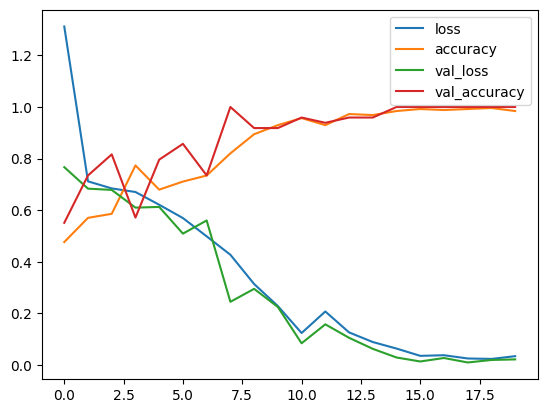

In [32]:
import pandas as pd
pd.DataFrame(history1.history).plot()

## Viewing our results on TensorBoard

In [38]:
# Upload experiment results to TensorBoard (uncomment to run)
!tensorboard dev upload --logdir ./Emotion\ Detection\ using\ CNN \
  --name "Emotion Detection CNN Project" \
  --description "Custom CNN model for Happy/Sad Prediction" \
  --one_shot


2023-08-11 06:20:39.799896: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./Emotion Detection using CNN

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   JBHN-MJHX



New experiment created. View your TensorBoard at: https://tensorbo

## Single Predictions

In [51]:
class_names = ['Happy', 'Sad']
def single_predictions(img_path, img_size=256):
  img = tf.io.read_file(img_path)
  decoded_img = tf.io.decode_image(img)
  resized_img = tf.image.resize(decoded_img, [img_size, img_size])
  input_tensor = tf.cast(resized_img/255. , dtype=tf.float32)
  y_pred = model1.predict(tf.expand_dims(input_tensor, axis=0))
  if tf.round(y_pred) == 1:
    y_prob = y_pred
  else:
    y_prob = 1.0 - y_pred[0][0]


  plt.imshow(input_tensor)
  plt.title(f'{class_names[int(tf.round(tf.squeeze(y_pred)))]} \n Probability : {y_prob}')

1/1 [==============================] - 0s 113ms/step


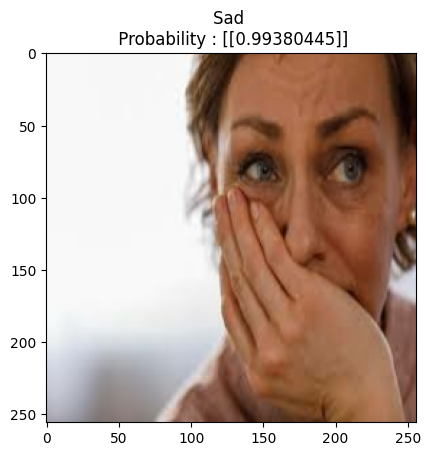

In [52]:
single_predictions('images.jpg')

1/1 [==============================] - 0s 19ms/step


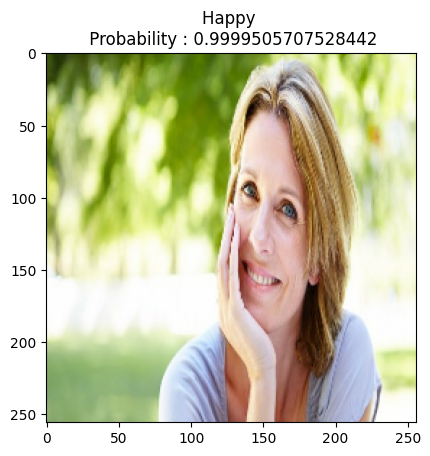

In [53]:
single_predictions('/content/11-Habits-of-Truly-Happy-People.jpg')

1/1 [==============================] - 0s 33ms/step


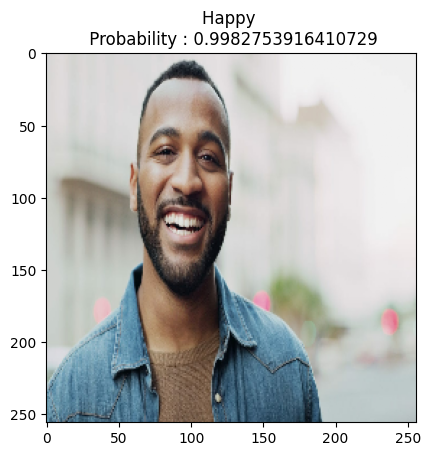

In [54]:
single_predictions('/content/05-12-21-happy-people.jpg')

1/1 [==============================] - 0s 32ms/step


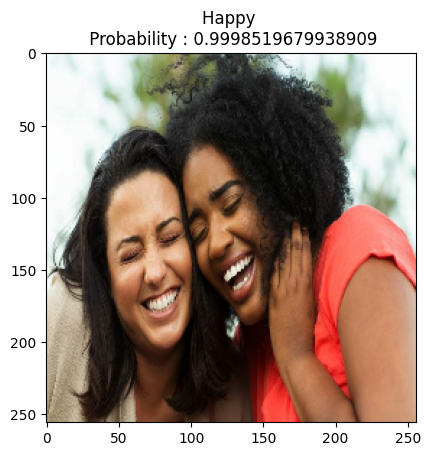

In [55]:
single_predictions('/content/960x0.jpg')

1/1 [==============================] - 0s 34ms/step


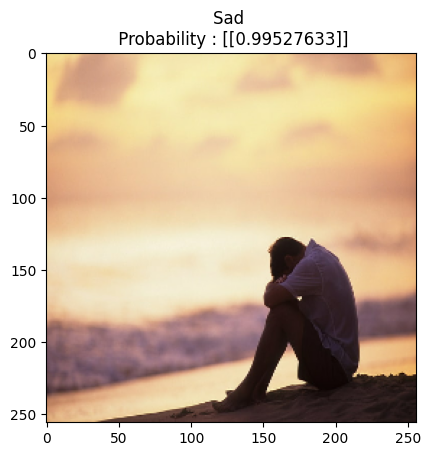

In [56]:
single_predictions('/content/dark-depression-mood-people-wallpaper-preview.jpg')

## Saving our model

In [57]:
model1.save('emotion_detection_model.h5')